# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados e Não Estruturados</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [1]:
# carregando a biblioteca necessária
import pandas as pd

### Exercício 1)

Considere a tabela com os dados a seguir

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento | Foto
 :------ |:--------- |:----- | --- | --- 
 joao@provider.com     | João | Oliveira | 1996 | foto1033.jpg
 bet89@hoster.net    | Elizabete | Costa Silva | 1989 | foto0010.jpg
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976 | foto2401.jpg
 
 De acordo com a definição de dados estruturados e não estruturados, esse conjunto de dados é
 
 <font color='red'>(a) Estruturado</font><br>
 (b) Não-estruturado<br>
 (c) Estruturado quando não consideramos o atributo *Foto*<br>
 (d) Estruturado quando não consideramos os atributos *username* e *Foto*<br>
 
 Justifique sua escolha.

<font color='red'>Resposta</font>: *todos os campos e registros são endereçáveis e passíveis de armazenamento e recuperação. O atributo Foto se refere ao arquivo da imagem que contém a foto, mas não à informações visuais contidas nessas imagens. Ainda que as imagens sejam não-estruturadas, o dado relativo ao nome do arquivo é estruturado. Assim, a tabela contém dados estruturados*

---

### Exercício 2)

São características de dados não-estruturados

 (a) Facilidade de versionamento, baixo controle de coleta, e inexistência de formato bem definido para armazenamento<br>
 <font color='red'>(b) Alta dimensionalidade, armazenamento em formato binário ou textual, e alta flexibilidade na coleta dos dados</font><br>
 (c) Alta redundância, e informações fáceis de recuperar a partir dos dados brutos<br>
 (d) Inexistência de esquema de armazenamento e recuperação, e alto controle de integridade dos dados<br>



---
### Exercício 3)

Analise a base de dados "Missing", que contém 100 linhas. Em particular vamos estudar os atributos "Religion", "Profession" e "Year of Birth", que possuem dados faltantes. Explore esses atributos utilizando estatística descritiva com `describe()` e buscando pelo conjunto de valores únicos com `unique()`.

Após isso, responda as **questões I, II, III e IV** abaixo. OBS: Para responder às questões com maior segurança, pode ser necessário explorar a base de dados com outras ferramentas, gráficos e buscas.


In [2]:
data_m = pd.read_csv("./dados/TACTD-01-Missing.csv")

# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Religion
print(data_m['Religion'].describe(), '\n')
print(data_m['Religion'].unique())

count            98
unique            3
top       Christian
freq             96
Name: Religion, dtype: object 

['Christian' '---' nan 'x']


In [3]:
# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Profession
print(data_m['Profession'].describe(), '\n')
print(data_m['Profession'].unique())

count        98
unique        2
top       Nurse
freq         93
Name: Profession, dtype: object 

['Nurse' 'X' nan]


In [4]:
# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Year of Birth

print(data_m['Year of Birth'].describe(), '\n')
print(data_m['Year of Birth'].unique())

count      79.000000
mean     1974.177215
std         8.622807
min      1960.000000
25%      1967.000000
50%      1974.000000
75%      1981.500000
max      1998.000000
Name: Year of Birth, dtype: float64 

[1968. 1964. 1965.   nan 1973. 1986. 1979. 1969. 1981. 1987. 1972. 1983.
 1966. 1962. 1976. 1977. 1967. 1970. 1974. 1982. 1991. 1978. 1980. 1984.
 1963. 1985. 1960. 1998. 1971. 1975. 1961.]


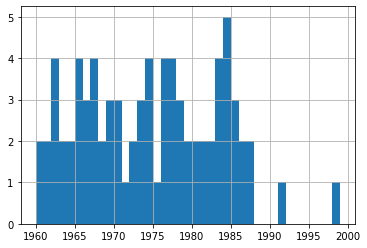

In [5]:
min_year = data_m['Year of Birth'].describe()['min']
max_year = data_m['Year of Birth'].describe()['max']

data_m['Year of Birth'].hist(bins=range(int(min_year), int(max_year)+2))

#### Exercício 3, questão I

Sobre o atributo Religion, qual das alternativas é mais plausível:

(a) há 2 dados faltantes, do tipo completamente aleatório<br>
<font color='red'>(b) há 4 dados faltantes, podendo ser do tipo completamente aleatório (MCAR) ou não-aleatório</font><br>
(c) há 2 dados faltantes, do tipo não-aleatório<br>
(d) há 4 dados faltantes, do tipo (condicionalmente) aleatório<br>

<font color='red'>Resposta</font>: *apesar de não constar como NaN, valores como 'x'e '---' são também considerados faltantes. É provável que a perda seja completamente aleatória, mas não podemos descartar o caso não-aleatório pois é possível que todas as pessoas não cristãs omitiram a religião devido a não serem cristãs, o que deve ser investigado.*

#### Exercício 3, questão II

Sobre o atributo Profession, é possível dizer que:

(a) há 7 dados errôneos<br>
(b) há 2 dados faltantes<br>
(c) há 2 dados faltantes e 5 dados errôneos<br>
<font color='red'>(d) há 7 dados faltantes</font><br>

<font color='red'>Resposta</font>: *o valor 'X' não parece ser um dado errôneo, pois não é um erro de digitação, nem é uma profissão válida e que possa ser falsamente atribuida a uma pessoa, portanto tanto NaNs quanto 'X' são faltantes*


#### Exercício 3, questão III

Sobre o atributo Profession, é possível dizer que os dados faltantes são:

<font color='red'>(a) uma mistura dos tipos (condicionalmente) aleatório (MAR) e completamente aleatório (MCAR)<br></font>
(b) unicamente do tipo (condicionalmente) aleatório (MAR) <br>
(b) unicamente do tipo completamente aleatório (MCAR) <br>
(d) uma mistura dos tipos não aleatório e (condicionalmente) aleatório (MAR)<br>

<font color='red'>Resposta</font>: *nenhum profissional de Portugal/Lisboa reportou sua profissão, indicando o caso condicionalmente aleatório. Porém, há também duas outras perdas que não parecem estar relacionadas a um padrão, representando faltantes completamente aleatórios*


#### Exercício 3, questão IV

Sobre o atributo Year of Birth, de acordo com a análise exploratória, qual(is) tipo(s) de dados faltantes são mais plausíveis (escolha apenas uma opcao abaixo):

(a) uma mistura dos tipos (condicionalmente) aleatório (MAR) e completamente aleatório (MCAR)<br>
(b) do tipo (condicionalmente) aleatório (MAR) <br>
(c) do tipo completamente aleatório (MCAR) <br>
<font color='red'>(d) do tipo não aleatório<br></font>

<font color='red'>Resposta</font>: *A distribuição do ano de nascimento mostra que há uma frequência regular de anos entre 1960 e meados dos anos 1980, com máximo em 1998 e muitos faltantes nesse intervalo, o que indica omissão ou perda de dados relacionada ao valor do ano entre meados de 1980 e a década de 1990, e portanto não aleatória ou de respostas não ignoráveis.*


---

### Exercício 4)

Analise a base de dados "BCE_Outliers_Err_Desbal", utilizada nas aulas. Utilize `boxplot()` e `hist()` para explorar cada atributo (exceto Weight, já analisado na aula), mas também codifique outras buscas que achar necessário para responder às  **questões I, II, III e IV**  abaixo.

In [6]:
data2 = pd.read_csv("./dados/TACTD_01-BCE_Outliers_Err_Desbal.csv") 

#### Exercício 4, questão I

Procure por um **outlier** não comentado na aula. Esse outlier é um 

(a) idade gestacional com valor muito alto<br>
(b) idade gestacional com valor muito baixo<br>
<font color='red'>(c) ano com valor muito alto</font><br>
(d) ano com valor muito baixo<br>

#### Exercício 4, questão II

Como interpretar o outlier encontrado?

(a) outlier global e dado errôneo resultado de problema na coleta de dados, deve ser removido<br>
(b) outlier global, mas não deve ser modificado<br>
<font color='red'>(c) outlier global e dado errôneo, podendo ser corrigido</font><br>
(d) outlier condicional, deve ser removido<br>

<font color='red'>Resposta</font>: *o valor '22017' é um dado errôneo mas devido aos dados estarem ordenados por mês e ano, pode ser interpretado como um erro de inputacao facilmente corrigível para 2017*

#### Exercício 4, questão III

Precisamos construir um modelo de regressão (do aprendizado supervisionado) para predizer a idade gestacional de um bebê baseado no mês e ano de nascimento.

(a) é possível construir o modelo sem nenhum pré-processamento<br>
(b) os dados possuem redundância, impedindo a análise por regressão<br>
<font color='red'>(c) os dados estão desbalanceados, sendo necessário controlar esse efeito</font><br>
(d) os dados possuem outliers globais, que devem ser identificados e tratados antes de realizar a análise<br>

<font color='red'>Resposta</font>: *o ano de 2016 possui apenas 12 exemplos, contra 60 do ano de 2017. Em particular, o mês 11/2016 possui apenas 3 exemplos. Assim, os dados estão desbalanceados, e portanto esse fator deve ser considerado na análise*


#### Exercício 4, questão IV

Analise o atributo idade gestacional por possíveis problemas típicos dentre os estudados

(a) os dados possuem outliers condicionais relacionados ao peso<br>
(b) os dados possuem redundância, por haver muitos valores repetidos no invervalo mínimo e máximo<br>
(c) os dados estão desbalanceados<br>
<font color='red'>(d) os dados parecem não possuir qualquer problema<br><font>